# Brain Tumor Dataset (figshare)
> authored by Satrajit Kar, MESE@JU'25

Installing Dependencies

In [ ]:
!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25837 sha256=83aeecfedd33ccb1411ef244fa3e2f325f7bbdf0cb0e389ffec36ab29d65bbba
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


modules loaded


Organizing Data into Folders

In [ ]:
import shutil
import os

# Define the source directories
source_directories = ['/kaggle/input/brain-tumor/1', '/kaggle/input/brain-tumor/2', '/kaggle/input/brain-tumor/3']

# Define the destination directory
destination_directory = '/kaggle/working/brain-tumor'

# Ensure the destination directory exists; create it if it doesn't
os.makedirs(destination_directory, exist_ok=True)

# Iterate over each source directory and copy its contents to the destination directory
for source_dir in source_directories:
    # Get the name of the directory being copied
    source_dir_name = os.path.basename(source_dir)

    # Create the destination path for the directory
    destination_dir = os.path.join(destination_directory, source_dir_name)

    # Copy the entire directory from source to destination
    shutil.copytree(source_dir, destination_dir)

print("Folders copied successfully.")

Folders copied successfully.


In [ ]:
import shutil
import os

# Define the source directories inside /content/brain-tumor
source_directories = ['/kaggle/working/brain-tumor/1', '/kaggle/working/brain-tumor/2', '/kaggle/working/brain-tumor/3']

# Define the destination directories
destination_directories = ['/kaggle/working/figshare/meningioma', '/kaggle/working/figshare/glioma', '/kaggle/working/figshare/pituitary']

# Ensure the destination directories exist; create them if they don't
for dest_dir in destination_directories:
    os.makedirs(dest_dir, exist_ok=True)

# Iterate over each source directory and move its files to the corresponding destination directory
for i, source_dir in enumerate(source_directories):
    # Get the list of files in the source directory
    files = os.listdir(source_dir)

    # Move each file to the corresponding destination directory
    for file in files:
        source_file = os.path.join(source_dir, file)
        destination_dir = destination_directories[i]
        shutil.move(source_file, destination_dir)

print("Files moved successfully.")

Files moved successfully.


**Splitting the Data in 90:10 ratio**

In [ ]:
import shutil
import os
import random

# Set the paths for the source folder
source_folder = '/kaggle/working/figshare/meningioma'

# Define the destination folders (train and test)
train_folder = '/kaggle/working/figshare/train/meningioma'
test_folder = '/kaggle/working/figshare/test/meningioma'

# Create train and test folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# List all files in the source directory
files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

# Calculate the number of files for train (90%) and test (10%)
num_files_total = len(files)
num_files_train = int(0.9 * num_files_total)
num_files_test = num_files_total - num_files_train

# Randomly select files for train and test
files_train = random.sample(files, num_files_train)
files_test = [f for f in files if f not in files_train]

# Move files to train folder
for file in files_train:
    source_path = os.path.join(source_folder, file)
    destination_path = os.path.join(train_folder, file)
    shutil.move(source_path, destination_path)

# Move files to test folder
for file in files_test:
    source_path = os.path.join(source_folder, file)
    destination_path = os.path.join(test_folder, file)
    shutil.move(source_path, destination_path)

print(f"{num_files_train} files moved to train folder.")
print(f"{num_files_test} files moved to test folder.")


637 files moved to train folder.
71 files moved to test folder.


In [ ]:
import shutil
import os
import random

# Set the paths for the source folder
source_folder = '/kaggle/working/figshare/glioma'

# Define the destination folders (train and test)
train_folder = '/kaggle/working/figshare/train/glioma'
test_folder = '/kaggle/working/figshare/test/glioma'

# Create train and test folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# List all files in the source directory
files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

# Calculate the number of files for train (90%) and test (10%)
num_files_total = len(files)
num_files_train = int(0.9 * num_files_total)
num_files_test = num_files_total - num_files_train

# Randomly select files for train and test
files_train = random.sample(files, num_files_train)
files_test = [f for f in files if f not in files_train]

# Move files to train folder
for file in files_train:
    source_path = os.path.join(source_folder, file)
    destination_path = os.path.join(train_folder, file)
    shutil.move(source_path, destination_path)

# Move files to test folder
for file in files_test:
    source_path = os.path.join(source_folder, file)
    destination_path = os.path.join(test_folder, file)
    shutil.move(source_path, destination_path)

print(f"{num_files_train} files moved to train folder.")
print(f"{num_files_test} files moved to test folder.")


1283 files moved to train folder.
143 files moved to test folder.


In [ ]:
import shutil
import os
import random

# Set the paths for the source folder
source_folder = '/kaggle/working/figshare/pituitary'

# Define the destination folders (train and test)
train_folder = '/kaggle/working/figshare/train/pituitary'
test_folder = '/kaggle/working/figshare/test/pituitary'

# Create train and test folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# List all files in the source directory
files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

# Calculate the number of files for train (90%) and test (10%)
num_files_total = len(files)
num_files_train = int(0.9 * num_files_total)
num_files_test = num_files_total - num_files_train

# Randomly select files for train and test
files_train = random.sample(files, num_files_train)
files_test = [f for f in files if f not in files_train]

# Move files to train folder
for file in files_train:
    source_path = os.path.join(source_folder, file)
    destination_path = os.path.join(train_folder, file)
    shutil.move(source_path, destination_path)

# Move files to test folder
for file in files_test:
    source_path = os.path.join(source_folder, file)
    destination_path = os.path.join(test_folder, file)
    shutil.move(source_path, destination_path)

print(f"{num_files_train} files moved to train folder.")
print(f"{num_files_test} files moved to test folder.")


837 files moved to train folder.
93 files moved to test folder.


In [ ]:
import shutil
import os

# List of subfolders to remove
subfolders = ['/kaggle/working/figshare/glioma', '/kaggle/working/figshare/meningioma', '/kaggle/working/figshare/pituitary']

# Iterate over each subfolder and remove it recursively
for subfolder in subfolders:
    shutil.rmtree(subfolder)

print("Subfolders removed successfully.")

Subfolders removed successfully.


In [ ]:
folder_name = 'figshare_processed'
colab_path='/kaggle/working/'
colab_folder_path = f'{colab_path}/{folder_name}'
if not os.path.exists(colab_folder_path):
    os.makedirs(colab_folder_path)
    print(f'Folder "{folder_name}" created.')

folder_name = 'Training'
colab_path='/kaggle/working/figshare_processed/'
colab_folder_path = f'{colab_path}/{folder_name}'
if not os.path.exists(colab_folder_path):
    os.makedirs(colab_folder_path)
    print(f'Folder "{folder_name}" created.')

folder_name = 'Testing'
colab_path='/kaggle/working/figshare_processed/'
colab_folder_path = f'{colab_path}/{folder_name}'
if not os.path.exists(colab_folder_path):
    os.makedirs(colab_folder_path)
    print(f'Folder "{folder_name}" created.')

Folder "figshare_processed" created.
Folder "Training" created.
Folder "Testing" created.


****Data Preprocessing****

In [ ]:
import numpy as np
from tqdm import tqdm
import cv2
import os
import imutils

def crop_img(img):
    """
    Finds the extreme points on the image and crops the rectangular out of them
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)

    # threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    # find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    ADD_PIXELS = 0
    new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

    return new_img

if __name__ == "__main__":
    training = "/kaggle/working/figshare/train"
    testing = "/kaggle/working/figshare/test"
    training_dir = os.listdir(training)
    testing_dir = os.listdir(testing)
    IMG_SIZE = 256

    for dir in training_dir:
        save_path = '/kaggle/working/figshare_processed/Training/'+ dir
        path = os.path.join(training,dir)
        image_dir = os.listdir(path)
        for img in image_dir:
            image = cv2.imread(os.path.join(path,img))
            new_img = crop_img(image)
            new_img = cv2.resize(new_img,(IMG_SIZE,IMG_SIZE))
            if not os.path.exists(save_path):
                os.makedirs(save_path)
            cv2.imwrite(save_path+'/'+img, new_img)

    for dir in testing_dir:
        save_path = '/kaggle/working/figshare_processed/Testing/'+ dir
        path = os.path.join(testing,dir)
        image_dir = os.listdir(path)
        for img in image_dir:
            image = cv2.imread(os.path.join(path,img))
            new_img = crop_img(image)
            new_img = cv2.resize(new_img,(IMG_SIZE,IMG_SIZE))
            if not os.path.exists(save_path):
                os.makedirs(save_path)
            cv2.imwrite(save_path+'/'+img, new_img)

In [ ]:
# Generate data paths with labels
train_data_dir = '/kaggle/working/figshare_processed/Training'
filepaths = []
labels = []

folds = os.listdir(train_data_dir)
for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [ ]:
train_df

,filepaths,labels
0,/kaggle/working/figshare_processed/Training/pi...,pituitary
1,/kaggle/working/figshare_processed/Training/pi...,pituitary
2,/kaggle/working/figshare_processed/Training/pi...,pituitary
3,/kaggle/working/figshare_processed/Training/pi...,pituitary
4,/kaggle/working/figshare_processed/Training/pi...,pituitary
...,...,...
2752,/kaggle/working/figshare_processed/Training/me...,meningioma
2753,/kaggle/working/figshare_processed/Training/me...,meningioma
2754,/kaggle/working/figshare_processed/Training/me...,meningioma
2755,/kaggle/working/figshare_processed/Training/me...,meningioma


In [ ]:
# Generate data paths with labels
test_data_dir = '/kaggle/working/figshare_processed/Testing'
filepaths = []
labels = []

folds = os.listdir(test_data_dir)
for fold in folds:
    foldpath = os.path.join(test_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
ts_df = pd.concat([Fseries, Lseries], axis= 1)

In [ ]:
ts_df

,filepaths,labels
0,/kaggle/working/figshare_processed/Testing/pit...,pituitary
1,/kaggle/working/figshare_processed/Testing/pit...,pituitary
2,/kaggle/working/figshare_processed/Testing/pit...,pituitary
3,/kaggle/working/figshare_processed/Testing/pit...,pituitary
4,/kaggle/working/figshare_processed/Testing/pit...,pituitary
...,...,...
302,/kaggle/working/figshare_processed/Testing/men...,meningioma
303,/kaggle/working/figshare_processed/Testing/men...,meningioma
304,/kaggle/working/figshare_processed/Testing/men...,meningioma
305,/kaggle/working/figshare_processed/Testing/men...,meningioma


Splitting into Training and Validation Sets

In [ ]:
# valid and test dataframe
train_df, valid_df = train_test_split(train_df,  train_size= 0.8, shuffle= True, random_state= 123)

In [ ]:
# cropped image size
batch_size = 16
img_size = (256,256)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( ts_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 2205 validated image filenames belonging to 3 classes.
Found 552 validated image filenames belonging to 3 classes.
Found 307 validated image filenames belonging to 3 classes.


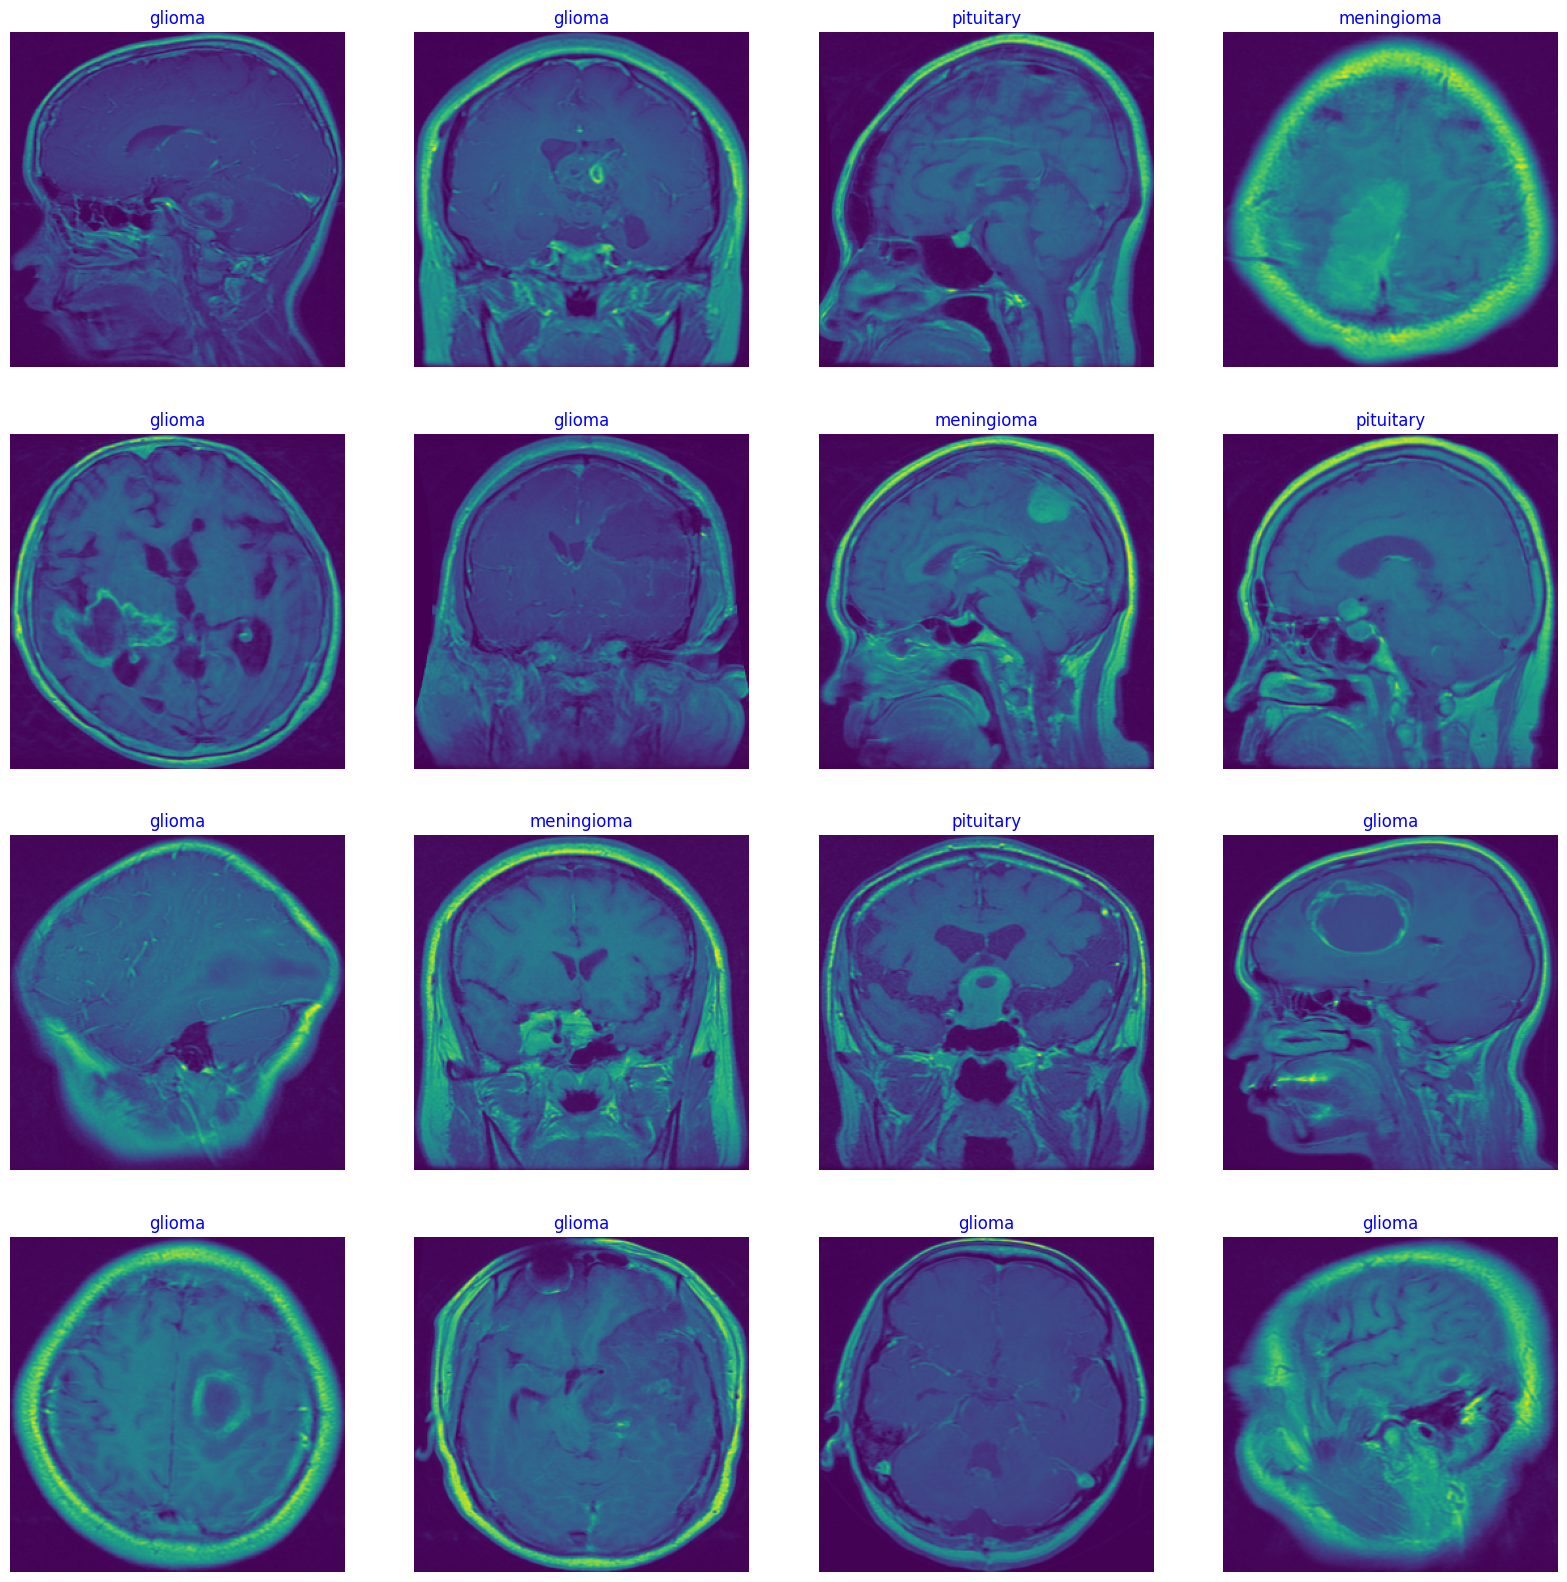

In [ ]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

EfficientNetB3 Model Creation

In [ ]:
from tensorflow.keras.applications import EfficientNetB3

# Create Model Structure
img_size = (256, 256)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

base_model = tf.keras.applications.EfficientNetB3(include_top= False, weights= 'imagenet', input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

43941136/43941136 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                         

Model Performance

In [ ]:
# Fit the model
history = model.fit(x= train_gen, epochs= 30, verbose= 1, validation_data= valid_gen,
                    validation_steps= None, shuffle= False)

Epoch 1/30


2024-07-22 04:42:25.718345: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


138/138 [==============================] - 113s 330ms/step - loss: 7.2114 - accuracy: 0.8213 - val_loss: 6.2379 - val_accuracy: 0.8732
Epoch 2/30
138/138 [==============================] - 41s 295ms/step - loss: 5.0369 - accuracy: 0.9193 - val_loss: 4.3578 - val_accuracy: 0.9656
Epoch 3/30
138/138 [==============================] - 41s 297ms/step - loss: 3.6886 - accuracy: 0.9633 - val_loss: 3.1803 - val_accuracy: 0.9674
Epoch 4/30
138/138 [==============================] - 41s 294ms/step - loss: 2.7576 - accuracy: 0.9751 - val_loss: 2.3708 - val_accuracy: 0.9764
Epoch 5/30
138/138 [==============================] - 40s 292ms/step - loss: 2.0449 - accuracy: 0.9846 - val_loss: 1.7535 - val_accuracy: 0.9692
Epoch 6/30
138/138 [==============================] - 41s 294ms/step - loss: 1.5393 - accuracy: 0.9810 - val_loss: 1.3131 - val_accuracy: 0.9783
Epoch 7/30
138/138 [==============================] - 41s 294ms/step - loss: 1.1400 - accuracy: 0.9841 - val_loss: 0.9935 - val_accuracy: 0.

In [ ]:
import pandas as pd

# Create a DataFrame from the history dictionary
history_df = pd.DataFrame(history.history)

# Use the DataFrame's 'to_string' method to print the DataFrame in a tabular format
print(history_df.to_string())


        loss  accuracy  val_loss  val_accuracy
0   7.211420  0.821315  6.237870      0.873188
1   5.036858  0.919274  4.357821      0.965580
2   3.688616  0.963265  3.180330      0.967391
3   2.757588  0.975057  2.370831      0.976449
4   2.044923  0.984581  1.753497      0.969203
5   1.539293  0.980952  1.313065      0.978261
6   1.139999  0.984127  0.993516      0.978261
7   0.851299  0.992290  0.734812      0.983696
8   0.643681  0.991383  0.596465      0.972826
9   0.495694  0.992744  0.463955      0.976449
10  0.397828  0.994104  0.361513      0.974638
11  0.311991  0.995011  0.275715      0.989130
12  0.271050  0.991837  0.256369      0.981884
13  0.227815  0.994104  0.220894      0.983696
14  0.207995  0.991837  0.237662      0.969203
15  0.195444  0.992290  0.168251      0.989130
16  0.164617  0.996825  0.173925      0.978261
17  0.167212  0.993651  0.164043      0.987319
18  0.145703  0.996825  0.139374      0.994565
19  0.138560  0.996825  0.135596      0.989130
20  0.134177 

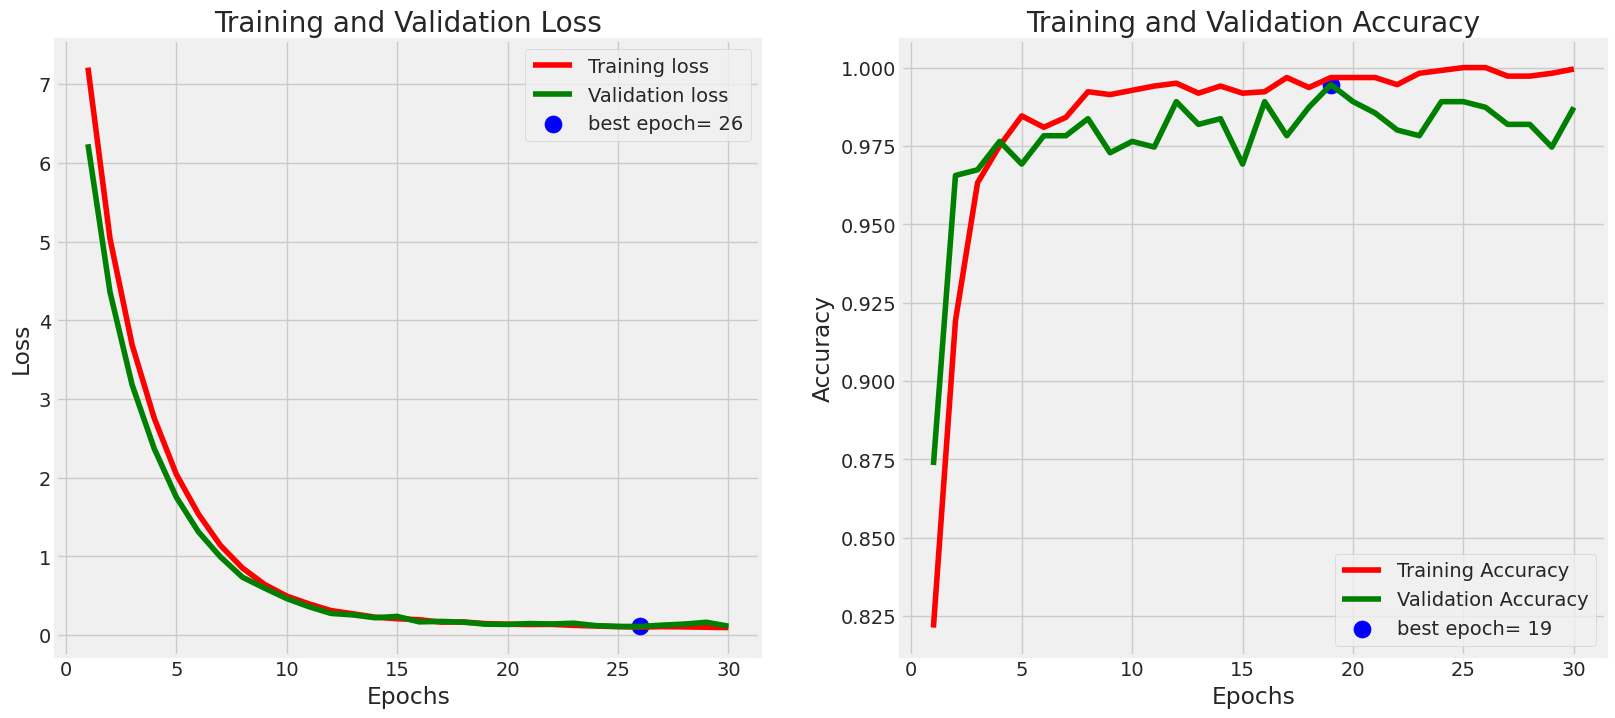

In [ ]:
#Plot the model's performance

# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
model.save_weights("/kaggle/working/EfficientNetB3_BrainTumor_Figshare_Weights.h5")

In [ ]:
# Test its accuracy

ts_length = len(ts_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

307/307 [==============================] - 2s 7ms/step - loss: 0.0972 - accuracy: 0.9902
Train Loss:  0.07993373274803162
Train Accuracy:  1.0
--------------------
Validation Loss:  0.11324220895767212
Validation Accuracy:  0.9873188138008118
--------------------
Test Loss:  0.09716185927391052
Test Accuracy:  0.990227997303009


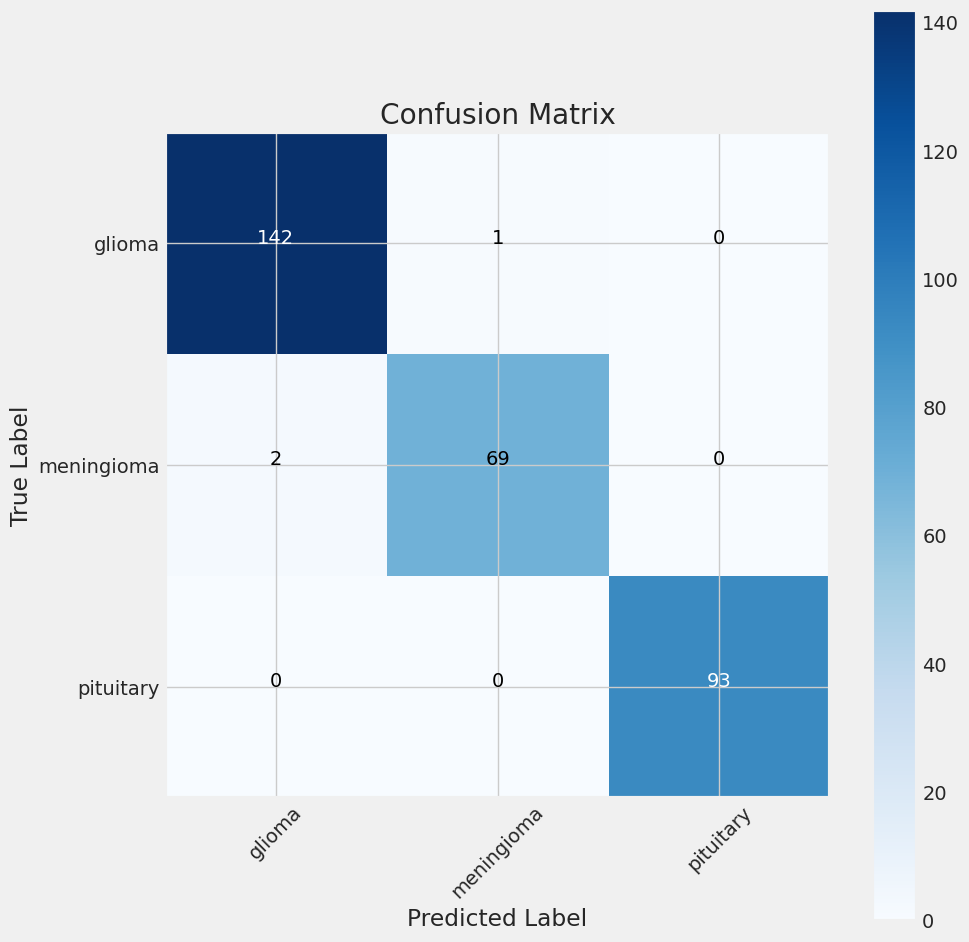

In [ ]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      glioma       0.99      0.99      0.99       143
  meningioma       0.99      0.97      0.98        71
   pituitary       1.00      1.00      1.00        93

    accuracy                           0.99       307
   macro avg       0.99      0.99      0.99       307
weighted avg       0.99      0.99      0.99       307



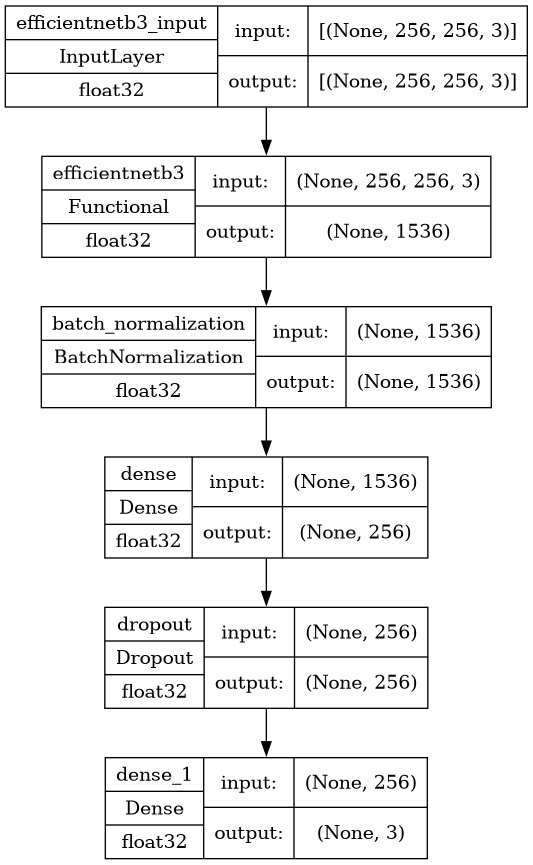

In [ ]:
!pip install pydot graphviz

# Import necessary modules
from tensorflow.keras import models
from tensorflow.keras.utils import plot_model
from IPython.display import Image

model_visual = models.Model(inputs=model.input, outputs=model.output)

# Save model architecture to a file
plot_model(model_visual, show_dtype=True, to_file='efficientnetb3_model_architecture.png', show_shapes=True)

# Display model architecture in the notebook
Image(retina=True, filename='efficientnetb3_model_architecture.png')


Feature Extraction using Pre-trained Model Weights

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D
import os
import pandas as pd
import numpy as np

# Load the EfficientNetB3 model
base_model_efnetb3 = EfficientNetB3(include_top=False, input_shape=(224, 224, 3))
base_model_efnetb3.load_weights('/kaggle/working/EfficientNetB3_BrainTumor_Figshare_Weights.h5', by_name=True)

x = base_model_efnetb3.output
x = GlobalAveragePooling2D()(x)
feature_extraction_model = Model(inputs=base_model_efnetb3.input, outputs=x)

labels = {'glioma':1, 'meningioma':2,'pituitary':3}
training_global_average_pool_2d_efnetb3 = []
testing_global_average_pool_2d_efnetb3 = []

In [ ]:
main_folder = '/kaggle/working/figshare_processed/Training'
total_files=1
subfiles=1
# Iterate through subfolders and print subfolder name and file names
for root, dirs, files in os.walk(main_folder):
  print(total_files)
  for file in files:
    if file.endswith(('jpg', 'jpeg', 'png')):
      d=[]
      file_path = os.path.join(root, file)  # Check for image file formats
      img = image.load_img(file_path, target_size=(224, 224))
      img_array = image.img_to_array(img)
      img_array = np.expand_dims(img_array, axis=0)
      processed_img = preprocess_input(img_array)
      global_average_features = feature_extraction_model.predict(processed_img)
      one_dim_list = np.array(global_average_features).flatten()
      sub_folder_name=os.path.basename(root)
      ch=labels[sub_folder_name]
      d.append(sub_folder_name+'_'+file)
      d.extend(one_dim_list)
      d.append(ch)
      training_global_average_pool_2d_efnetb3.append(d)
      subfiles+=1
      total_files+=1

1
1
1/1 [==============================] - 0s 29ms/step
838
1/1 [==============================] - 0s 29ms/step
2121
1/1 [==============================] - 0s 30ms/step


In [ ]:
training_df=pd.DataFrame(training_global_average_pool_2d_efnetb3)

In [ ]:
training_df

,0,1,2,3,4,5,6,7,8,9,...,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537
0,pituitary_1499.png,-0.165293,-0.109843,-0.116551,0.188277,-0.014746,1.241364,0.254084,-0.036668,0.296959,...,0.873405,-0.154330,-0.194152,0.916067,-0.137440,-0.123486,-0.201855,-0.144070,-0.084727,3
1,pituitary_2214.png,-0.231737,-0.220230,-0.179093,0.298434,-0.091888,0.680353,-0.204208,-0.051756,-0.164449,...,0.248404,-0.133391,0.166843,-0.128585,0.030137,0.006120,-0.229939,-0.190943,-0.168106,3
2,pituitary_1635.png,-0.222698,-0.133606,-0.151473,0.119919,0.130825,0.547077,0.213293,0.084834,-0.130579,...,0.258620,-0.175063,0.215541,0.235356,-0.163819,0.180248,-0.233143,-0.201451,0.015301,3
3,pituitary_946.png,-0.183089,-0.207364,-0.169829,0.090523,-0.017251,0.020061,-0.095603,0.130142,-0.206070,...,0.321034,-0.191974,-0.192216,0.738819,-0.127476,-0.071706,-0.254235,-0.139896,-0.144627,3
4,pituitary_1051.png,-0.020697,-0.112733,-0.111862,-0.108861,0.141250,0.036616,-0.152644,-0.182015,-0.178427,...,0.087028,-0.143043,0.011700,0.402548,-0.164802,-0.041180,-0.245530,-0.129252,-0.063102,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752,meningioma_2834.png,-0.202114,-0.083516,-0.208249,0.121781,0.162072,0.413511,0.062531,-0.168938,-0.165137,...,0.282098,-0.160714,-0.192175,0.180851,-0.146755,-0.134058,-0.235362,-0.112076,-0.153554,2
2753,meningioma_2947.png,-0.205397,-0.170231,-0.186875,-0.037305,0.162309,0.552061,0.403171,-0.139012,-0.172634,...,0.763029,-0.132243,-0.220978,0.356570,-0.151193,-0.121864,-0.236638,-0.102980,-0.202548,2
2754,meningioma_2683.png,-0.183200,-0.205003,-0.183272,-0.171499,0.112842,0.023815,-0.091701,-0.160204,-0.148662,...,-0.010633,-0.131546,-0.143719,0.417230,-0.120828,-0.123823,-0.205041,-0.185952,-0.193501,2
2755,meningioma_2925.png,-0.143431,-0.209447,-0.084585,0.088374,-0.031709,0.529459,0.111242,0.058777,-0.174265,...,-0.227853,-0.115094,-0.208627,0.531227,-0.163876,-0.182879,-0.255854,-0.210514,-0.020687,2


In [ ]:
main_folder = '/kaggle/working/figshare_processed/Testing'
total_files=1
subfiles=1
# Iterate through subfolders and print subfolder name and file names
for root, dirs, files in os.walk(main_folder):
  print(total_files)
  for file in files:
    if file.endswith(('jpg', 'jpeg', 'png')):
      d=[]
      file_path = os.path.join(root, file)  # Check for image file formats
      img = image.load_img(file_path, target_size=(224, 224))
      img_array = image.img_to_array(img)
      img_array = np.expand_dims(img_array, axis=0)
      processed_img = preprocess_input(img_array)
      global_average_features = feature_extraction_model.predict(processed_img)
      one_dim_list = np.array(global_average_features).flatten()
      sub_folder_name=os.path.basename(root)
      ch=labels[sub_folder_name]
      d.append(sub_folder_name+'_'+file)
      d.extend(one_dim_list)
      d.append(ch)
      testing_global_average_pool_2d_efnetb3.append(d)
      subfiles+=1
      total_files+=1

1
1
1/1 [==============================] - 0s 31ms/step
94
1/1 [==============================] - 0s 34ms/step
237
1/1 [==============================] - 0s 30ms/step


In [ ]:
testing_df=pd.DataFrame(testing_global_average_pool_2d_efnetb3)

In [ ]:
testing_df

,0,1,2,3,4,5,6,7,8,9,...,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537
0,pituitary_2228.png,-0.198346,-0.130722,-0.150539,0.096920,0.133670,0.554383,-0.203248,0.110861,-0.039818,...,0.786403,-0.151648,0.113244,0.127811,-0.220076,0.006034,-0.211664,-0.202582,-0.045623,3
1,pituitary_980.png,-0.213739,-0.171454,-0.134172,-0.115566,-0.014502,0.041808,-0.082113,-0.089340,-0.123112,...,0.098992,-0.112800,-0.134741,0.136614,-0.153022,0.034890,-0.218955,-0.144836,-0.226113,3
2,pituitary_1737.png,-0.204376,-0.128864,-0.103125,0.624328,0.112973,0.809158,-0.150633,0.861565,0.161241,...,0.468983,-0.131408,0.192277,-0.124538,-0.037765,0.225765,-0.241364,-0.158957,0.001505,3
3,pituitary_2092.png,-0.213763,-0.084196,-0.183307,-0.043586,0.270367,0.870562,-0.093559,-0.165534,0.326009,...,1.223540,-0.177295,-0.222335,0.539755,-0.122547,-0.123681,-0.253305,-0.163754,-0.174799,3
4,pituitary_978.png,0.281581,-0.210240,-0.124160,0.038859,0.415832,0.240375,-0.005366,0.172877,0.121187,...,0.182248,-0.067517,0.172896,0.831241,0.158889,0.055615,-0.113720,0.024935,0.161764,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,meningioma_2520.png,-0.157129,-0.157720,-0.165141,-0.108704,0.118475,0.394069,-0.145749,-0.171589,-0.159842,...,0.353087,-0.135653,0.077810,0.043298,-0.103423,-0.162264,-0.240040,-0.132312,-0.229027,2
303,meningioma_2979.png,-0.204069,-0.135702,-0.142457,0.205463,-0.184752,0.468816,-0.194010,0.241558,0.362515,...,0.754186,-0.195481,0.482414,0.288001,-0.011400,0.115156,-0.070072,-0.182965,-0.107165,2
304,meningioma_2701.png,-0.129633,-0.108987,-0.206961,0.022190,0.225892,0.433208,-0.125103,-0.191050,-0.046905,...,0.078841,-0.130949,-0.224452,-0.028215,-0.100631,-0.138518,-0.220933,-0.176383,-0.224061,2
305,meningioma_2641.png,-0.166939,-0.146093,-0.129974,-0.084456,-0.014431,-0.050762,-0.144152,-0.094539,-0.155730,...,0.031164,-0.108485,0.008888,0.295961,-0.147796,-0.139973,-0.240879,-0.150438,-0.168733,2


In [ ]:
# Save Testing DataFrame to a CSV file
testing_df.to_csv('figshare_testing.csv', index=False)

# Save Training DataFrame to a CSV file
training_df.to_csv('figshare_training.csv', index=False)

**No Mutual Information, SVM (Polynomial) for Classification**

SVM (Polynomial) 

              precision    recall  f1-score   support

      glioma       0.98      0.98      0.98       134
  meningioma       0.94      0.97      0.96        68
   pituitary       1.00      0.98      0.99       105

    accuracy                           0.98       307
   macro avg       0.97      0.98      0.97       307
weighted avg       0.98      0.98      0.98       307

Confusion Matrix 



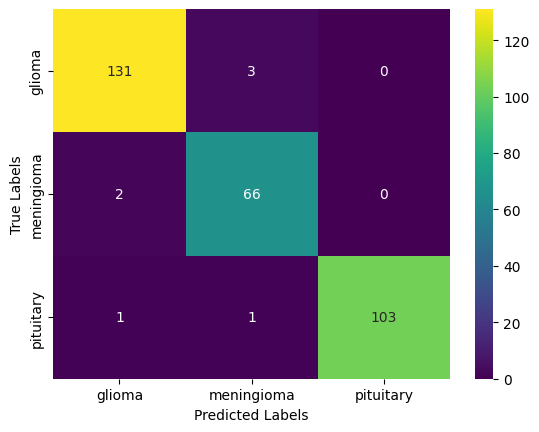


Accuracy SVM (Polynomial): 97.72 %


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score,recall_score,cohen_kappa_score,precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training dataset
df = pd.read_csv('/kaggle/working/figshare_training.csv')

# Separate features and target

X_train = df.iloc[:, 0:-1]
y_train = df.iloc[:, -1]

# Initialize the MinMaxScaler and apply it
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

# Initialize the SVM Classifier
clf = SVC(kernel='poly', gamma = 0.5, C = 0.1, random_state=7)

# Train the model
clf.fit(X_train, y_train)

# Load the unseen testing dataset
df_test = pd.read_csv('/kaggle/working/figshare_testing.csv')

X_test = df_test.iloc[:, 0:-1]
y_test = df_test.iloc[:, -1]

X_test = scaler.transform(X_test)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Define the class names
class_names = ['glioma', 'meningioma', 'pituitary']

# Print the classification report
print("SVM (Polynomial) \n")
print(classification_report(y_test, y_pred, target_names=class_names))

# Print the confusion matrix
print("Confusion Matrix \n")
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, annot=True, fmt='d', cmap='viridis', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print('\nAccuracy SVM (Polynomial): {:.2f} %'.format(accuracy_score(y_test,y_pred)*100))


Finding the Best Number of Reduced Features Selected by Mutual Information
>Plotting Accuracy vs. Number of Features Graph

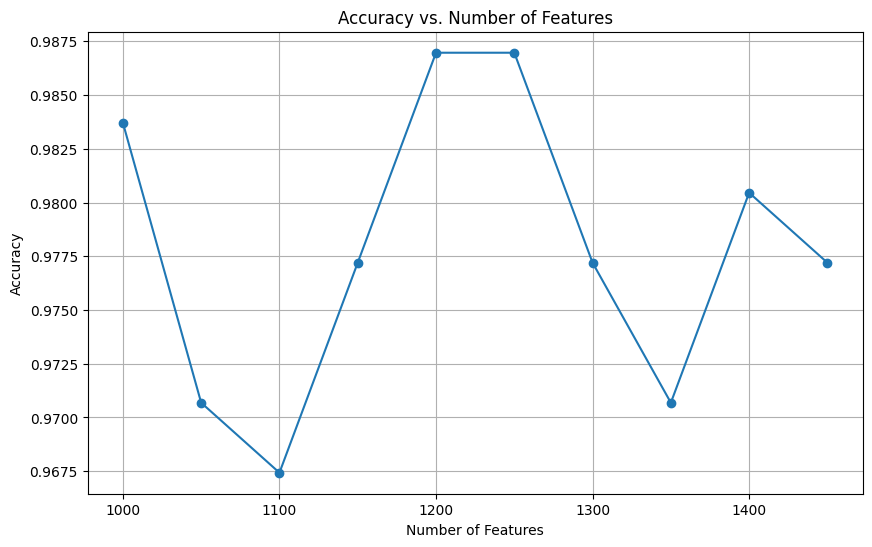

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score,recall_score,cohen_kappa_score,precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training dataset
df = pd.read_csv('/kaggle/working/figshare_training.csv')

# Separate features and target
X_train = df.iloc[:, 1:-1]
y_train = df.iloc[:, -1]

# Initialize the MinMaxScaler and apply it
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

# Initialize the SVM Classifier
clf = SVC(kernel='poly', gamma = 0.5, C = 0.1, random_state=7)

# Load the unseen testing dataset
df_test = pd.read_csv('/kaggle/working/figshare_testing.csv')
X_test = df_test.iloc[:, 1:-1]
y_test = df_test.iloc[:, -1]

X_test = scaler.transform(X_test)

# Define the range of k
k_values = range(1000, 1500, 50)

# Initialize a list to store accuracy for each k
accuracy_list = []

for k in k_values:
    # Apply Mutual Information for feature selection
    selector = SelectKBest(mutual_info_classif, k=k)
    X_train_k = selector.fit_transform(X_train, y_train)
    X_test_k = selector.transform(X_test)

    # Train the model
    clf.fit(X_train_k, y_train)

    # Predict the labels of the test set
    y_pred = clf.predict(X_test_k)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Plot the accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_list, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

**Mutual Information, SVM**

SVM (Polynomial) 

              precision    recall  f1-score   support

      glioma       0.99      0.99      0.99       134
  meningioma       0.96      0.99      0.97        68
   pituitary       1.00      0.99      1.00       105

    accuracy                           0.99       307
   macro avg       0.98      0.99      0.98       307
weighted avg       0.99      0.99      0.99       307

Confusion Matrix 



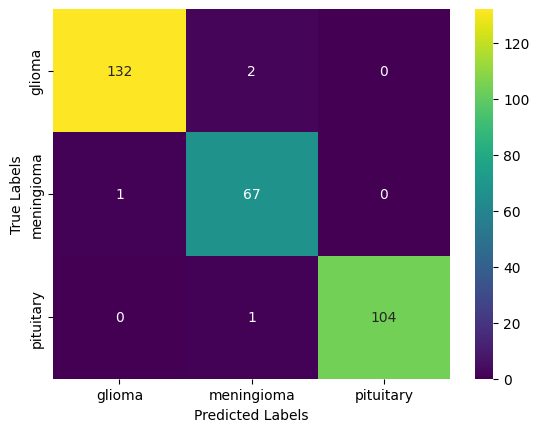


Accuracy SVM (Polynomial): 98.70 %


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score,recall_score,cohen_kappa_score,precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training dataset
df = pd.read_csv('/kaggle/working/figshare_training.csv')

# Separate features and target
X_train = df.iloc[:, 0:-1]
y_train = df.iloc[:, -1]

# Initialize the MinMaxScaler and apply it
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

# Apply Mutual Information for feature selection
selector = SelectKBest(mutual_info_classif, k=1200)
X_train = selector.fit_transform(X_train, y_train)

# Initialize the SVM Classifier
clf = SVC(kernel='poly', gamma = 0.5, C = 0.1, random_state=7)

# Train the model
clf.fit(X_train, y_train)

# Load the unseen testing dataset
df_test = pd.read_csv('/kaggle/working/figshare_testing.csv')

X_test = df_test.iloc[:, 0:-1]
y_test = df_test.iloc[:, -1]

X_test = scaler.transform(X_test)
X_test = selector.transform(X_test)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Define the class names
class_names = ['glioma', 'meningioma', 'pituitary']

# Print the classification report
print("SVM (Polynomial) \n")
print(classification_report(y_test, y_pred, target_names=class_names))

# Print the confusion matrix
print("Confusion Matrix \n")
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, annot=True, fmt='d', cmap='viridis', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print('\nAccuracy SVM (Polynomial): {:.2f} %'.format(accuracy_score(y_test,y_pred)*100))